In [1]:
import matplotlib.pyplot as plt
import numpy as np

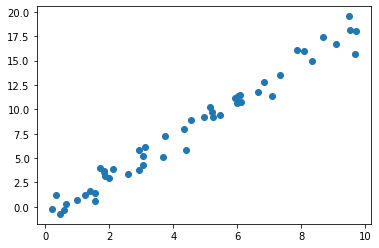

In [2]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

__Estimators are empty machine learning models, after choosing hyperparameters and train them they are trained
ML models , ready to be tested against Test data set , after testing we check accuracy of the model.
After satisfactory result the model is ready to be deployed using Pickel and flask or Kubernates.__


In [3]:
#Choose machine learning model to be applied on featurematrix(feature columns) and target array(predicted value)
from sklearn.linear_model import LinearRegression

#set hyperparameter of model according to your desired modeling
model = LinearRegression(fit_intercept=True)

X = x[:, np.newaxis]

In [4]:
model.fit(X,y)
print("Model Coef :: ",model.coef_)
print("Model Intercept :: ",model.intercept_)

Model Coef ::  [1.9776566]
Model Intercept ::  -0.9033107255311164


array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

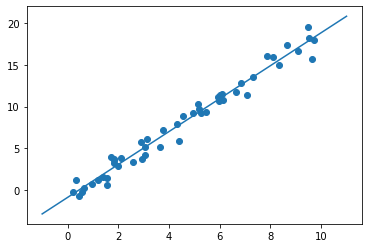

In [5]:
#Generate new Feature matrix from -1 to 11 (x coordinate at similar interval)
xfit = np.linspace(-1, 11, dtype="float64")
Xfit = xfit[:,np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

xfit

In [16]:
import seaborn as sns
iris =  sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
from sklearn.model_selection import train_test_split

trainIris , testIris = train_test_split(iris,test_size=0.3,random_state=1)

In [21]:
trainIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
118,7.7,2.6,6.9,2.3,virginica
18,5.7,3.8,1.7,0.3,setosa
4,5.0,3.6,1.4,0.2,setosa
45,4.8,3.0,1.4,0.3,setosa
59,5.2,2.7,3.9,1.4,versicolor


In [22]:
testIris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica


In [24]:
Xtrain = trainIris.drop('species',axis=1)
ytrain=trainIris['species']

Xtest = testIris.drop('species',axis=1)
ytest=testIris['species']

In [30]:
print(Xtrain.head())
print("############")
print(ytrain.head())

     sepal_length  sepal_width  petal_length  petal_width
118           7.7          2.6           6.9          2.3
18            5.7          3.8           1.7          0.3
4             5.0          3.6           1.4          0.2
45            4.8          3.0           1.4          0.3
59            5.2          2.7           3.9          1.4
############
118     virginica
18         setosa
4          setosa
45         setosa
59     versicolor
Name: species, dtype: object


In [31]:
print(Xtest.head())
print("############")
print(ytest.head())

     sepal_length  sepal_width  petal_length  petal_width
14            5.8          4.0           1.2          0.2
98            5.1          2.5           3.0          1.1
75            6.6          3.0           4.4          1.4
16            5.4          3.9           1.3          0.4
131           7.9          3.8           6.4          2.0
############
14         setosa
98     versicolor
75     versicolor
16         setosa
131     virginica
Name: species, dtype: object


In [32]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9333333333333333